In [10]:
from defillama2 import DefiLlama
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [11]:
def human_format_dollar_or_num(dollar=False, decimals=0):
    """ 
    Return a function for formatting matplot axis numbers human friendly. 

    Parameters
    ----------
    dollar: logical
        If True, will add $ in front of the numbers.
    decimals: int
        Number of decimals to display.
    """

    base_fmt = '%.{}f%s'.format(decimals)
    if dollar:
        base_fmt = '$' + base_fmt

    def human_format(num, pos): # pos is necessary as it'll be used by matplotlib
        magnitude = 0
        while abs(num) >= 1000:
            magnitude += 1
            num /= 1000.0
        return base_fmt % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])
    return human_format

## Create a DefiLlama instance

In [12]:
obj = DefiLlama()
obj

## Get latest yields for all pools, along with other info

In [13]:
df = obj.get_pools_yields() # See https://defillama.com/yields for the meaning of columns.
print(df.shape)
df.head()

(11867, 30)


,chain,project,symbol,tvlUsd,apyBase,apyReward,apy,...,apyMean30d,volumeUsd1d,volumeUsd7d,apyBaseInception,predictedClass,predictedProbability,binnedConfidence
0,Ethereum,lido,STETH,14716960287,4.0000,NaN,4.0000,...,3.9417,NaN,NaN,NaN,Stable/Up,58.0000,1.0000
1,Tron,justlend,BTC,3148520354,0.0003,0.0232,0.0234,...,0.0243,NaN,NaN,NaN,Stable/Up,79.0000,3.0000
2,Arbitrum,camelot-v2,BRUH-USDC,3055925878,0.0000,NaN,0.0000,...,0.0000,NaN,NaN,NaN,None,NaN,NaN
3,Ethereum,coinbase-wrapped-staked-eth,CBETH,2206062592,6.7452,NaN,6.7452,...,3.5738,NaN,NaN,NaN,Down,72.0000,2.0000
4,Arbitrum,camelot-v2,WHEAT-WETH,2130342847,0.0000,NaN,0.0000,...,0.0009,NaN,"150,382.6395",NaN,None,NaN,NaN


In [17]:
df = obj.get_pool_hist_apy('aa70268e-4b52-42bf-a116-608b370f9501')
df

,tvlUsd,apy,apyBase,apyReward,il7d,apyBase7d
date,,,,,,
2023-02-06 00:00:00+00:00,"6,884,855.0000",1.8018,1.8018,NaN,NaN,NaN
2023-02-07 00:00:00+00:00,"6,413,779.0000",1.9773,1.9773,NaN,NaN,NaN
2023-02-08 00:00:00+00:00,"8,085,766.0000",1.7345,1.7345,NaN,NaN,NaN
2023-02-09 00:00:00+00:00,"13,255,693.0000",1.0749,1.0749,NaN,NaN,NaN
2023-02-10 00:00:00+00:00,"14,305,773.0000",1.0582,1.0582,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-06-29 00:00:00+00:00,"41,258,297.0000",2.3213,2.3213,NaN,NaN,NaN
2023-06-30 00:00:00+00:00,"35,552,844.0000",2.4759,2.4759,NaN,NaN,NaN
2023-07-01 00:00:00+00:00,"25,581,584.0000",2.7476,2.7476,NaN,NaN,NaN


In [15]:
df.columns

Index(['tvlUsd', 'apy', 'apyBase', 'apyReward', 'il7d', 'apyBase7d'], dtype='object')

## Dai Saving Rate

In [ ]:
#ETH_Aave_USDC
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'pool', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,pool,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
192,Ethereum,aave-v3,USDC,aa70268e-4b52-42bf-a116-608b370f9501,33562518,2.5966,2.5966,0.1130,-0.0552,NaN,2.4057,NaN,2.0902,0.0269


In [ ]:
#ETH_Aave_DAI
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['DAI']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
395,Ethereum,aave-v3,DAI,11300939,1.9617,1.9617,-0.8546,-0.5929,NaN,2.8426,NaN,1.9139,0.0822


In [ ]:
#ETH_Aave_USDT
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['USDT']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
105,Ethereum,aave-v3,USDT,61355873,1.7466,1.7466,-0.9951,-0.5319,NaN,2.2672,NaN,2.9216,0.2790


In [ ]:
#ETH_Compound_USDC
is_true = ((df.project == 'compound')&
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
53,Ethereum,compound,USDC,149799917,2.0557,3.1402,0.5150,0.4945,NaN,2.5177,NaN,1.9071,0.0381


In [ ]:
#ETH_Compound_DAI
is_true = ((df.project == 'compound')&
           df.symbol.isin(['DAI']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
65,Ethereum,compound,DAI,111638222,1.8773,3.4398,1.1898,1.0614,NaN,2.3223,NaN,2.1515,0.0332


In [ ]:
#ETH_Compound_USDT
is_true = ((df.project == 'compound')&
           df.symbol.isin(['USDT']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
131,Ethereum,compound,USDT,51447243,3.5230,3.5230,0.6417,1.1439,NaN,3.0596,NaN,2.5376,0.1078


In [ ]:
#ETH_Compound_USDC
is_true = ((df.project == 'compound') &
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
53,Ethereum,compound,USDC,149799917,2.0557,3.1402,0.5150,0.4945,NaN,2.5177,NaN,1.9071,0.0381


In [ ]:
#ARB_Aave3_USDC
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)


,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
443,Arbitrum,aave-v3,USDC,9574449,2.3156,2.3156,-0.1915,0.9683,NaN,2.1073,NaN,0.9324,0.0308
5388,Arbitrum,aave-v3,USDC,160551,1.9245,1.9245,NaN,NaN,NaN,3.3397,NaN,3.2895,0.1152


In [ ]:
#ARB_Aave_DAI
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['DAI']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)


,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1199,Arbitrum,aave-v3,DAI,2299106,2.0541,2.0541,0.0086,0.4607,NaN,1.7416,NaN,1.2612,0.0435


In [ ]:
#ARB_Aave_USDT
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['USDT']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
890,Arbitrum,aave-v3,USDT,3607937,2.9291,2.9291,-0.7140,0.4943,NaN,3.2983,NaN,2.7066,0.1440


In [ ]:
#ARB_Radiant_USDC
is_true = ((df.project == 'radiant-v2') &
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
170,Arbitrum,radiant-v2,USDC,39333564,2.2127,2.2127,0.1034,NaN,NaN,2.0551,NaN,2.0282,0.0203


In [ ]:
#ARB_Radiant_DAI
is_true = ((df.project == 'radiant-v2') &
           df.symbol.isin(['DAI']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
746,Arbitrum,radiant-v2,DAI,4592235,2.2640,2.2640,0.0862,NaN,NaN,1.9135,NaN,1.9357,0.0234


In [ ]:
#ARB_Radiant_USDT
is_true = ((df.project == 'radiant-v2') &
           df.symbol.isin(['USDT']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
438,Arbitrum,radiant-v2,USDT,9774911,2.6272,2.6272,0.1674,NaN,NaN,2.0355,NaN,2.0760,0.0245


In [ ]:
#Opt_Aave_USDC
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
977,Optimism,aave-v3,USDC,3188448,2.5756,2.5756,0.4434,0.5640,NaN,2.2239,NaN,1.4295,0.0606


In [ ]:
#Opt_Aave_DAI
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['DAI']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1924,Optimism,aave-v3,DAI,1091790,2.4727,2.4727,0.6454,1.3916,NaN,1.5955,NaN,1.5608,0.0679


In [ ]:
#Opt_Aave_DAI
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['USDT']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1277,Optimism,aave-v3,USDT,2107791,2.1667,2.1667,-7.2423,0.2105,NaN,2.6216,NaN,3.5778,0.1814


In [ ]:
#Opt_Sonne_USDC
is_true = ((df.project == 'sonne-finance') &
           df.symbol.isin(['USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
799,Optimism,sonne-finance,USDC,4233935,3.5398,3.8706,-2.3743,0.1988,NaN,4.1147,NaN,3.9300,0.0531


In [ ]:
#Opt_Sonne_DAI
is_true = ((df.project == 'sonne-finance') &
           df.symbol.isin(['DAI']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
923,Optimism,sonne-finance,DAI,3427723,3.7114,4.0932,-0.2225,0.4466,NaN,4.2462,NaN,4.8097,0.0763


In [ ]:
#Opt_Sonne_USDT
is_true = ((df.project == 'sonne-finance') &
           df.symbol.isin(['USDT']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1012,Optimism,sonne-finance,USDT,3020250,5.1898,5.5938,-1.4402,1.7583,NaN,4.8867,NaN,5.0904,0.1336


## $ LP Rates

In [ ]:
#LP_Curve_crvUSD/USDC
is_true = ((df.project == 'curve-dex') &
           df.symbol.isin(['USDC-CRVUSD']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)


,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
172,Ethereum,curve-dex,USDC-CRVUSD,39029098,0.2230,6.5744,NaN,NaN,NaN,7.1284,NaN,6.9400,0.0815


In [ ]:
#LP_Curve_crvUSD/USDT
is_true = ((df.project == 'curve-dex') &
           df.symbol.isin(['USDT-CRVUSD']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
192,Ethereum,curve-dex,USDT-CRVUSD,33614859,0.1147,5.5138,NaN,NaN,NaN,6.1400,NaN,6.1357,0.0267


In [ ]:
#LP_Curve_crvUSD/Frax
is_true = ((df.project == 'curve-dex') &
           df.symbol.isin(['FRAX-CRVUSD']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
398,Ethereum,curve-dex,FRAX-CRVUSD,11144428,0.0318,3.4721,NaN,NaN,NaN,3.9799,NaN,4.0579,0.0580


In [ ]:
## Mainnet_UniswapV3_DAI/USDC_0.01%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['DAI-USDC']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[68,cols]

chain           Ethereum
project         makerdao
symbol             G-UNI
tvlUsd         106702151
apyBase              NaN
apy               0.0000
apyPct7D          0.0000
apyPct30D         0.0000
apyBase7d            NaN
apyMean30d        0.0000
volumeUsd7d          NaN
mu                0.0000
sigma             0.0000
Name: 68, dtype: object

In [ ]:
## Mainnet_UniswapV3_USDC/USDT_0.01%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['USDC-USDT']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[91,cols]

chain                Ethereum
project        convex-finance
symbol               MIM-3CRV
tvlUsd               76027699
apyBase                0.0150
apy                    6.2871
apyPct7D               1.5837
apyPct30D             -0.2746
apyBase7d                 NaN
apyMean30d             5.4248
volumeUsd7d               NaN
mu                    10.0071
sigma                  0.1712
Name: 91, dtype: object

In [ ]:
## Mainnet_UniswapV2_USDC/DAI
is_true = ((df.project == 'uniswap-v2') &
           df.symbol.isin(['DAI-USDC']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
257,Ethereum,uniswap-v2,DAI-USDC,21706455,0.0320,0.0320,0.0213,0.0038,0.0587,0.0584,"81,614.8040",0.2455,0.0604


In [ ]:
## Mainnet_UniswapV2_USDC/USDT
is_true = ((df.project == 'uniswap-v2') &
           df.symbol.isin(['USDC-USDT']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
254,Ethereum,uniswap-v2,USDC-USDT,21889535,0.9313,0.9313,0.3946,0.7213,0.3951,0.3465,"554,368.3598",3.3477,0.4348


In [ ]:
## ARB_UniswapV3_DAI/USDC_0.01%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['DAI-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[950,cols]

chain                BSC
project        thorchain
symbol         BTCB-RUNE
tvlUsd           3332540
apyBase              NaN
apy               5.1941
apyPct7D          4.9361
apyPct30D         0.4990
apyBase7d            NaN
apyMean30d        1.4407
volumeUsd7d          NaN
mu               11.6368
sigma             0.3576
Name: 950, dtype: object

In [ ]:
## ARB_UniswapV3_USDC/USDT_0.01%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['USDC-USDT']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1547,Arbitrum,uniswap-v3,USDC-USDT,1574187,7.0097,7.0097,-6.1608,NaN,7.5897,11.0395,"22,976,102.9040",10.7381,0.4471


In [ ]:
## ARB_Camelot_USDC/DAI
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['DAI-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2951,Arbitrum,camelot-v2,DAI-USDC,521809,0.3742,2.1200,0.2918,NaN,0.5408,2.0548,"135,673.9476",4.1213,0.3977


In [ ]:
## ARB_Camelot_USDC/USDT
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['USDT-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1371,Arbitrum,camelot-v2,USDT-USDC,1865596,1.9741,2.7815,0.2329,NaN,1.3846,3.3345,"1,241,900.6144",8.2000,0.3902


In [ ]:
## OPT_UniswapV3_DAI/USDC_0.01%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['DAI-USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[950,cols]

chain                BSC
project        thorchain
symbol         BTCB-RUNE
tvlUsd           3332540
apyBase              NaN
apy               5.1941
apyPct7D          4.9361
apyPct30D         0.4990
apyBase7d            NaN
apyMean30d        1.4407
volumeUsd7d          NaN
mu               11.6368
sigma             0.3576
Name: 950, dtype: object

In [ ]:
## OPT_UniswapV3_DAI/USDC_0.01%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['USDC-USDT']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[950,cols]

chain                BSC
project        thorchain
symbol         BTCB-RUNE
tvlUsd           3332540
apyBase              NaN
apy               5.1941
apyPct7D          4.9361
apyPct30D         0.4990
apyBase7d            NaN
apyMean30d        1.4407
volumeUsd7d          NaN
mu               11.6368
sigma             0.3576
Name: 950, dtype: object

In [ ]:
## OPT_Velodrome_USDC/DAI
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['USDC-DAI']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2682,Optimism,velodrome,USDC-DAI,627146,NaN,1.7145,-5.0136,-2.9519,NaN,4.9871,NaN,5.1371,0.1102
9966,Optimism,velodrome,USDC-DAI,20539,NaN,0.0000,0.0000,0.0000,NaN,0.0000,NaN,0.1245,0.0220


In [ ]:
## OPT_Velodrome_USDC/USDT
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['USDC-USDT']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
3443,Optimism,velodrome,USDC-USDT,390029,NaN,4.6030,-2.6071,2.2956,NaN,4.6995,NaN,6.1120,0.1714


In [ ]:
## OPT_Velodrome_USDC/sUSD
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['USDC-SUSD']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
347,Optimism,velodrome,USDC-SUSD,14076575,NaN,1.7323,-4.8569,-3.1127,NaN,4.7445,NaN,7.9510,0.1606
10673,Optimism,velodrome,USDC-SUSD,15364,NaN,0.0016,-0.0021,-0.0021,NaN,0.0033,NaN,0.0438,0.0072


## ETH/Stablecoin Pools

## Mainnet

In [ ]:
## Mainnet_Uniswap_USDC/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['USDC-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[35,cols]

chain                Ethereum
project            uniswap-v3
symbol              WBTC-WETH
tvlUsd              241360959
apyBase               10.5620
apy                   10.5620
apyPct7D               6.4131
apyPct30D             10.1096
apyBase7d              3.9762
apyMean30d             5.3774
volumeUsd7d   92,388,448.0789
mu                    10.9265
sigma                  0.4965
Name: 35, dtype: object

In [ ]:
## Mainnet_Uniswap_USDT/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-USDT']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[81,cols]


chain             Ethereum
project               aura
symbol         WSTETH-WETH
tvlUsd            87753223
apyBase             0.1000
apy                 3.5031
apyPct7D            0.2668
apyPct30D          -2.6172
apyBase7d              NaN
apyMean30d          3.7284
volumeUsd7d            NaN
mu                  5.9633
sigma               0.1248
Name: 81, dtype: object

In [ ]:
## Mainnet_Uniswap_DAI/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['DAI-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[81,cols]



chain             Ethereum
project               aura
symbol         WSTETH-WETH
tvlUsd            87753223
apyBase             0.1000
apy                 3.5031
apyPct7D            0.2668
apyPct30D          -2.6172
apyBase7d              NaN
apyMean30d          3.7284
volumeUsd7d            NaN
mu                  5.9633
sigma               0.1248
Name: 81, dtype: object

In [ ]:
## Mainnet_Uniswap_USDC/WETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['USDC-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[78,cols]

chain                Ethereum
project            uniswap-v3
symbol              USDC-WETH
tvlUsd               90772149
apyBase               12.5982
apy                   12.5982
apyPct7D              -7.9211
apyPct30D             11.2989
apyBase7d             15.6017
apyMean30d            13.6430
volumeUsd7d   74,976,981.4522
mu                    22.0645
sigma                  0.8568
Name: 78, dtype: object

In [ ]:
## Mainnet_Uniswap_USDT/WETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-USDT']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[124,cols]

chain            Ethereum
project         curve-dex
symbol         CRV-CVXCRV
tvlUsd           54617048
apyBase            0.9250
apy               13.9482
apyPct7D          13.8797
apyPct30D         13.1851
apyBase7d             NaN
apyMean30d         3.1829
volumeUsd7d           NaN
mu                 1.4307
sigma              0.1769
Name: 124, dtype: object

In [ ]:
## Mainnet_Uniswap_DAI/WETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['DAI-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[337,cols]

chain          Ethereum
project         unsheth
symbol          UNSHETH
tvlUsd         14665233
apyBase          3.9162
apy             10.2362
apyPct7D        -1.1039
apyPct30D       -0.6534
apyBase7d           NaN
apyMean30d      10.9264
volumeUsd7d         NaN
mu              18.1325
sigma            0.3628
Name: 337, dtype: object

## Arbitrum

In [ ]:
## ARB_Uniswap_USDC/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[150,cols]

chain            Cronos
project        tectonic
symbol             USDT
tvlUsd         44872488
apyBase          1.5948
apy              1.8077
apyPct7D         0.0004
apyPct30D       -0.0504
apyBase7d           NaN
apyMean30d       1.8213
volumeUsd7d         NaN
mu               1.7892
sigma            0.0294
Name: 150, dtype: object

In [ ]:
## ARB_Uniswap_USDT/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-USDT']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[338,cols]


chain             Ethereum
project        balancer-v2
symbol             OHM-DAI
tvlUsd            14659969
apyBase             0.2558
apy                 0.2560
apyPct7D            0.1963
apyPct30D          -3.4023
apyBase7d              NaN
apyMean30d          1.8181
volumeUsd7d            NaN
mu                  4.1926
sigma               0.4694
Name: 338, dtype: object

In [ ]:
## ARB_Uniswap_DAI/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-DAI']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[7661,cols]



chain                 Fantom
project        yearn-finance
symbol                  LINK
tvlUsd                 59599
apyBase                  NaN
apy                   0.0000
apyPct7D              0.0000
apyPct30D            -0.5991
apyBase7d                NaN
apyMean30d            0.0055
volumeUsd7d              NaN
mu                    1.0584
sigma                 0.0603
Name: 7661, dtype: object

In [ ]:
## ARB_Uniswap_USDC/WETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[621,cols]

chain          Polygon
project        aave-v2
symbol            USDT
tvlUsd         5960917
apyBase         1.5388
apy             1.5388
apyPct7D        0.1285
apyPct30D       0.7402
apyBase7d          NaN
apyMean30d      0.9675
volumeUsd7d        NaN
mu              1.8483
sigma           0.1665
Name: 621, dtype: object

In [ ]:
## ARB_Uniswap_USDT/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-USDT']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[876,cols]

chain                      BSC
project        pancakeswap-amm
symbol                ETH-WBNB
tvlUsd                 3694769
apyBase                 7.0900
apy                     7.0900
apyPct7D                3.7700
apyPct30D               4.6300
apyBase7d                  NaN
apyMean30d              5.3362
volumeUsd7d                NaN
mu                      7.5600
sigma                   0.1602
Name: 876, dtype: object

In [ ]:
## ARB_Uniswap_DAI/WETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-DAI']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[3371,cols]

chain            Avalanche
project           joe-v2.1
symbol         SAVAX-WAVAX
tvlUsd              407005
apyBase             3.4628
apy                 3.4628
apyPct7D            2.7894
apyPct30D              NaN
apyBase7d              NaN
apyMean30d          3.0376
volumeUsd7d            NaN
mu                  2.9958
sigma               0.1238
Name: 3371, dtype: object

In [ ]:
## ARB_Camelotv2_USDC/WETH
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['WETH-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)


,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1116,Arbitrum,camelot-v2,WETH-USDC,2595679,24.3624,26.3923,15.0117,NaN,17.6377,13.9988,"2,934,726.8200",25.5613,0.8129


In [ ]:
## Trader Joe ETH/USDC

In [ ]:
## ARB_Kyberswap_WETH/USDC
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WETH-USDC']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
4270,Arbitrum,kyberswap-elastic,WETH-USDC,256590,141.8864,169.4446,109.9790,128.6220,NaN,62.1639,NaN,52.6665,1.3665
1459,Arbitrum,kyberswap-elastic,WETH-USDC,1704841,33.6907,60.2295,-1.0048,22.2028,NaN,54.4422,NaN,53.3190,0.4570


In [ ]:
## ARB_Camelotv2_USDC/ARB
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['USDC-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma


In [ ]:
## OPT_Velodrome_USDC/WETH
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['WETH-USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2283,Optimism,velodrome,WETH-USDC,812828,NaN,17.0686,5.1626,6.5641,NaN,11.2890,NaN,17.5904,0.2809


In [ ]:
## OPT_Velodrome_OP/USDC
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['OP-USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2381,Optimism,velodrome,OP-USDC,762443,NaN,19.2463,-2.4343,-7.4826,NaN,25.1111,NaN,37.6031,0.5944


In [ ]:
## OPT_Kyberswap_WETH/USDC
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WETH-USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
3060,Optimism,kyberswap-elastic,WETH-USDC,487041,42.1275,65.7787,5.8834,21.3251,NaN,59.8405,NaN,61.0768,0.9501
3236,Optimism,kyberswap-elastic,WETH-USDC,439486,15.0765,49.5463,-32.4748,-1.1843,NaN,59.2872,NaN,59.2604,0.4914


In [ ]:
## OPT_Kyberswap_OP/USDC
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['OP-USDC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
3130,Optimism,kyberswap-elastic,OP-USDC,464970,43.8752,89.6844,-85.6821,-19.3434,NaN,158.4193,NaN,169.5646,1.5954


## ETH LSD Rates

In [ ]:
## Lido_stETH
is_true = (df.symbol.isin(['STETH']) &
           df.project.isin(['lido']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
0,Ethereum,lido,STETH,14781196077,4.0000,4.0000,0.2000,-0.5000,NaN,3.9558,NaN,4.6885,0.0495


In [ ]:
## Lido_rETH
is_true = (df.symbol.isin(['RETH']) &
           df.project.isin(['rocket-pool']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
6,Ethereum,rocket-pool,RETH,1593513181,3.2099,3.2099,0.1027,-0.5451,NaN,3.2080,NaN,4.3141,0.0389


In [ ]:
## Lido_frxETH
is_true = (df.symbol.isin(['FRXETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
842,Ethereum,stakedao,FRXETH,3926966,0.5952,7.1591,-0.3291,-4.6638,NaN,8.4238,NaN,16.8295,0.4418


## Crypto Deposit Rates

In [ ]:
#ETH_Aave_wETH
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
31,Ethereum,aave-v3,WETH,281909654,1.6087,1.6087,-0.2199,-0.7811,NaN,1.8350,NaN,1.9710,0.0166


In [ ]:
#ETH_Aave_wBTC
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['WBTC']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
47,Ethereum,aave-v3,WBTC,170398683,0.3132,0.3132,-0.2397,-0.5967,NaN,0.5735,NaN,0.2400,0.0123


In [ ]:
#ARB_Aave_wETH
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
144,Arbitrum,aave-v3,WETH,45874982,1.1854,1.1854,-0.0625,-0.3767,NaN,1.4048,NaN,0.7759,0.0189


In [ ]:
#ARB_Radiant_wETH
is_true = ((df.project == 'radiant-v2') &
           df.symbol.isin(['WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
117,Arbitrum,radiant-v2,WETH,57630541,1.3805,1.3805,0.1145,NaN,NaN,1.3525,NaN,1.3550,0.0033


In [ ]:
#ARB_Radiant_wstETH
is_true = ((df.project == 'radiant-v2') &
           df.symbol.isin(['WSTETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
198,Arbitrum,radiant-v2,WSTETH,31552776,0.5696,0.5696,-0.0957,NaN,NaN,0.5364,NaN,0.5351,0.0033


In [ ]:
#ARB_Radiant_ARB
is_true = ((df.project == 'radiant-v2') &
           df.symbol.isin(['ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
300,Arbitrum,radiant-v2,ARB,17602492,0.4515,0.4515,0.0129,NaN,NaN,0.4480,NaN,0.4497,0.0044


In [ ]:
#OPT_Aave_wETH
is_true = ((df.project == 'aave-v3') &
          (df.exposure == 'single')&
           df.symbol.isin(['WETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
246,Optimism,aave-v3,WETH,22995436,0.9950,0.9950,0.0304,-0.4282,NaN,1.1877,NaN,1.6714,0.0876


In [ ]:
#OPT_Sonne_wETH
is_true = ((df.project == 'sonne-finance') &
           df.symbol.isin(['WETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1046,Optimism,sonne-finance,WETH,2865224,2.9090,3.2402,-0.1838,-0.1023,NaN,3.5832,NaN,4.0128,0.0689


In [ ]:
#OPT_Sonne_wstETH
is_true = ((df.project == 'sonne-finance') &
           df.symbol.isin(['WSTETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
428,Optimism,sonne-finance,WSTETH,10168198,1.1040,1.3904,0.3612,-0.0741,NaN,1.3862,NaN,2.5434,0.1080


In [ ]:
#OPT_Sonne_OP
is_true = ((df.project == 'sonne-finance') &
           df.symbol.isin(['OP']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1451,Optimism,sonne-finance,OP,1714863,13.7214,14.5952,2.5024,1.4191,NaN,13.8400,NaN,11.7608,0.2218


## ETH/staked ETH Pools

In [ ]:
#Mainnet_Curve_ETH/steth
is_true = ((df.project == 'curve-dex') &
           df.symbol.isin(['ETH-STETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
86,Ethereum,curve-dex,ETH-STETH,80379522,2.6318,2.9446,0.6977,-0.5660,NaN,3.3576,NaN,3.3125,0.0616
10,Ethereum,curve-dex,ETH-STETH,894929851,1.8946,1.8953,0.0761,-1.3448,NaN,2.0952,NaN,5.7444,1.0907


In [ ]:
#Mainnet_Balancer_wstETH/WETH
is_true = ((df.project == 'balancer-v2') &
           df.symbol.isin(['WSTETH-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
71,Ethereum,balancer-v2,WSTETH-WETH,104166154,0.0046,1.1245,-0.4518,-0.3195,NaN,2.3862,NaN,2.9140,0.1052


In [ ]:
#Mainnet_Balancer_rETH/WETH
is_true = ((df.project == 'balancer-v2') &
           df.symbol.isin(['RETH-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
524,Ethereum,balancer-v2,RETH-WETH,7534729,0.9251,2.8662,0.9327,-0.9704,NaN,3.4535,NaN,5.7096,0.2797
74,Ethereum,balancer-v2,RETH-WETH,97927870,0.0134,2.5861,0.0637,-0.0015,NaN,4.4515,NaN,3.4926,0.1513


In [ ]:
#ARB_Curve_ETH/wsteth
is_true = ((df.project == 'curve-dex') &
           df.symbol.isin(['ETH-WSTETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
527,Arbitrum,curve-dex,ETH-WSTETH,7481776,1.8497,1.8497,0.0063,-1.9037,NaN,2.7922,NaN,4.6328,0.1003


In [ ]:
#ARB_Balancer_wstETH/WETH
is_true = ((df.project == 'balancer-v2') &
           df.symbol.isin(['WSTETH-WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
372,Arbitrum,balancer-v2,WSTETH-WETH,12895930,0.0101,0.0101,0.0019,0.0060,NaN,0.0998,NaN,2.6351,0.1209


In [ ]:
#ARB_Camelot_wstETH/WETH
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['WSTETH-WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
974,Arbitrum,camelot-v2,WSTETH-WETH,3191163,0.0248,0.8992,0.1708,NaN,0.0287,0.8158,"43,993.6723",4.8060,0.1521


In [ ]:
#OPT_Curve_ETH/steth
is_true = ((df.project == 'curve-dex') &
           df.symbol.isin(['ETH-WSTETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
308,Optimism,curve-dex,ETH-WSTETH,16662571,1.9371,3.6941,0.3572,-1.0721,NaN,3.6276,NaN,5.6566,0.0934


In [ ]:
#OPT_Beets_wsteth/weth
is_true = ((df.project == 'beethoven-x') &
           df.symbol.isin(['WSTETH-WETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
849,Optimism,beethoven-x,WSTETH-WETH,3890219,0.5898,4.7977,3.0771,NaN,NaN,"1,505.5286",NaN,3.7646,0.2881


In [ ]:
#OPT_Beets_reth/weth
is_true = ((df.project == 'beethoven-x') &
           df.symbol.isin(['WETH-RETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
298,Optimism,beethoven-x,WETH-RETH,17658467,0.0409,5.2079,1.0344,NaN,NaN,4.9488,NaN,5.0426,0.0489


In [ ]:
#OPT_Velodrome_wstETH/WETH
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['WSTETH-WETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1301,Optimism,velodrome,WSTETH-WETH,2040476,NaN,0.5740,-5.2817,-4.5897,NaN,3.9944,NaN,5.1532,0.1751
1751,Optimism,velodrome,WSTETH-WETH,1268693,NaN,0.1818,-0.0461,-0.0494,NaN,0.2225,NaN,4.5438,0.1969


In [ ]:
#OPT_Velodrome_rETH/WETH
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['WETH-RETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
451,Optimism,velodrome,WETH-RETH,9188810,NaN,0.1123,-2.1476,-5.2783,NaN,3.2326,NaN,8.1261,0.3083
8389,Optimism,velodrome,WETH-RETH,41698,NaN,0.0944,-0.1449,-0.1505,NaN,0.2469,NaN,4.3487,0.3167


## ETH/BTC LPs

In [ ]:
#Mainnet_Sushiswap_wbtc/wETH
is_true = ((df.project == 'sushiswap') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
247,Ethereum,sushiswap,WBTC-WETH,22887251,1.1114,1.1520,0.6420,1.0443,0.9497,0.8296,"1,393,312.0367",2.4789,0.1798


In [ ]:
#Mainnet_Uniswapv2_wbtc/wETH
is_true = ((df.project == 'uniswap-v2') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
430,Ethereum,uniswap-v2,WBTC-WETH,10128916,1.0457,1.0457,0.4336,1.0116,0.6933,2.4063,"450,120.4145",2.4047,0.3023


In [ ]:
#Mainnet_Uniswapv3_wbtc/wETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[73,cols]

chain                         BSC
project        binance-staked-eth
symbol                      WBETH
tvlUsd                  100583304
apyBase                    4.0942
apy                        4.0942
apyPct7D                   0.1281
apyPct30D                     NaN
apyBase7d                     NaN
apyMean30d                 4.3353
volumeUsd7d                   NaN
mu                         4.3276
sigma                      0.0152
Name: 73, dtype: object

In [ ]:
#Mainnet_Uniswapv3_wbtc/wETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[34,cols]

chain             Ethereum
project        morpho-aave
symbol                WETH
tvlUsd           242286644
apyBase             2.2883
apy                 2.2883
apyPct7D           -0.3531
apyPct30D          -0.9640
apyBase7d              NaN
apyMean30d          2.7118
volumeUsd7d            NaN
mu                  2.4352
sigma               0.0239
Name: 34, dtype: object

In [ ]:
#ARB_Kyberswap_wBTC/WETH_0.04%
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1106,Arbitrum,kyberswap-elastic,WBTC-WETH,2635926,11.1049,19.7707,-2.6338,-0.3865,NaN,24.4797,NaN,24.8771,0.2937


In [ ]:
#ARB_Camelot_wBTC/WETH
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
4319,Arbitrum,camelot-v2,WBTC-WETH,251214,0.8033,1.9459,-0.1109,NaN,0.7786,2.3607,"75,232.8436",5.9567,0.1495


In [ ]:
#ARB_Uniswapv3_wBTC/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[218,cols]

chain                Ethereum
project        convex-finance
symbol            USDT-CRVUSD
tvlUsd               27265341
apyBase                0.1147
apy                    8.0132
apyPct7D                  NaN
apyPct30D                 NaN
apyBase7d                 NaN
apyMean30d             8.8816
volumeUsd7d               NaN
mu                     8.8698
sigma                  0.0314
Name: 218, dtype: object

In [ ]:
#ARB_Uniswapv3_wBTC/WETH_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[805,cols]

chain              Ethereum
project        concentrator
symbol                 ACRV
tvlUsd              4175267
apyBase                 NaN
apy                  0.0000
apyPct7D             0.0000
apyPct30D            0.0000
apyBase7d               NaN
apyMean30d           0.0000
volumeUsd7d             NaN
mu                   0.0000
sigma                0.0000
Name: 805, dtype: object

In [ ]:
#OPT_Kyberswap_wBTC/WETH
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WSTETH-WBTC']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2961,Optimism,kyberswap-elastic,WSTETH-WBTC,517540,21.8176,34.2611,20.7250,22.2468,NaN,23.5583,NaN,25.8966,0.6950


In [ ]:
#OPT_Uniswapv3_wBTC/WETH_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WBTC-WETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)
#df.loc[218,cols]

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma


## ETH/Layer 2 Token LPs

In [ ]:
#Mainnet_Uniswapv3_WETH/ARB_1%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['ARB-WETH']) &
           df.chain.isin(['Ethereum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1406,Ethereum,uniswap-v3,ARB-WETH,1809311,79.3701,79.3701,-53.5751,65.1590,125.0965,101.1865,"4,876,849.7066",126.3855,2.8285


In [ ]:
#ARB_Uniswapv3_WETH/ARB_0.05%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[316,cols]

chain           Ethereum
project        curve-dex
symbol         WBTC-SBTC
tvlUsd          15499258
apyBase           0.0169
apy               1.1454
apyPct7D          1.0474
apyPct30D         1.0743
apyBase7d            NaN
apyMean30d        0.3244
volumeUsd7d          NaN
mu                0.3887
sigma             0.0647
Name: 316, dtype: object

In [ ]:
#ARB_Uniswapv3_WETH/ARB_0.3%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[350,cols]

chain          Optimism
project        stargate
symbol             USDC
tvlUsd         13738897
apyBase             NaN
apy              2.8167
apyPct7D         0.1001
apyPct30D       -0.2862
apyBase7d           NaN
apyMean30d       2.6604
volumeUsd7d         NaN
mu               4.4262
sigma            0.0665
Name: 350, dtype: object

In [ ]:
#ARB_Uniswapv3_WETH/ARB_1%
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[1534,cols]

chain                BSC
project            gamma
symbol         USDT-WBNB
tvlUsd           1592068
apyBase           0.0000
apy              12.4458
apyPct7D         -8.0700
apyPct30D         0.8205
apyBase7d            NaN
apyMean30d       15.7432
volumeUsd7d          NaN
mu               15.8212
sigma             1.3650
Name: 1534, dtype: object

In [ ]:
#ARB_Camelotv2_WETH/ARB
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
530,Arbitrum,camelot-v2,WETH-ARB,7436699,4.2659,5.7018,-2.9541,NaN,5.0639,6.8026,"2,414,032.0357",26.2272,1.2455


In [ ]:
#ARB_TraderJoeV2_WETH/ARB
is_true = ((df.project == 'camelot-v2') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
530,Arbitrum,camelot-v2,WETH-ARB,7436699,4.2659,5.7018,-2.9541,NaN,5.0639,6.8026,"2,414,032.0357",26.2272,1.2455


In [ ]:
#ARB_Sushiswap_WETH/ARB
is_true = ((df.project == 'sushiswap') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1492,Arbitrum,sushiswap,WETH-ARB,1649646,4.8206,5.7051,-4.5581,-2.6531,6.9497,9.9559,"734,908.7869",20.3762,0.8825


In [ ]:
#ARB_Kyberswap_WETH/ARB_0.25%
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[1525,cols]

chain            Ethereum
project        uniswap-v2
symbol          FNSP-WETH
tvlUsd            1608191
apyBase            0.0000
apy                0.0000
apyPct7D           0.0000
apyPct30D          0.0000
apyBase7d          0.0001
apyMean30d         0.0008
volumeUsd7d        8.6632
mu                 0.0001
sigma              0.0000
Name: 1525, dtype: object

In [ ]:
#ARB_Kyberswap_WETH/ARB_1%
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[1756,cols]

chain            Ethereum
project        uniswap-v2
symbol           PKF-WETH
tvlUsd            1264855
apyBase            2.0687
apy                2.0687
apyPct7D           1.9624
apyPct30D         -0.9107
apyBase7d          0.4673
apyMean30d         0.8255
volumeUsd7d   37,885.2616
mu                 2.3513
sigma              0.1546
Name: 1756, dtype: object

In [ ]:
#ARB_Kyberswap_WETH/ARB_2%
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WETH-ARB']) &
           df.chain.isin(['Arbitrum']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
#df.loc[is_true, cols].sort_values('apy', ascending=False)
df.loc[2239,cols]

chain               BSC
project            frax
symbol         FRAX-FXS
tvlUsd           839223
apyBase          1.9256
apy              1.9256
apyPct7D         0.1159
apyPct30D        1.4265
apyBase7d           NaN
apyMean30d       1.3497
volumeUsd7d         NaN
mu               2.3070
sigma            0.1088
Name: 2239, dtype: object

In [ ]:
#OPT_Uniswapv3_WETH/OP
is_true = ((df.project == 'uniswap-v3') &
           df.symbol.isin(['OP-WETH']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma


In [ ]:
#OPT_Velodrome_OP/WETH
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['WETH-OP']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2160,Optimism,velodrome,WETH-OP,895577,NaN,4.0769,-16.4782,-14.5469,NaN,16.1444,NaN,26.2926,0.4605


In [ ]:
#OPT_Velodrome_wstETH/OP
is_true = ((df.project == 'velodrome') &
           df.symbol.isin(['WSTETH-OP']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
2872,Optimism,velodrome,WSTETH-OP,549305,NaN,0.6880,-24.5855,-24.8706,NaN,20.2624,NaN,31.2257,0.5480


In [ ]:
#OPT_Kyberswap_WETH/OP_2%
is_true = ((df.project == 'kyberswap-elastic') &
           df.symbol.isin(['WETH-OP']) &
           df.chain.isin(['Optimism']))
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
3918,Optimism,kyberswap-elastic,WETH-OP,305249,30.5221,70.8336,-84.4322,-38.9271,NaN,127.8079,NaN,109.1569,2.0456


In [ ]:
# let's look at pools on Ethereum, Polygon and Arbitrum, discarding outlier pools (with extreme APYs and usually low TVL)
is_true = (df.symbol.isin(['AAVE-USDC']) &
           df.chain.isin(['Ethereum', 'Arbitrum','Polygon']) & 
           (~df.outlier))

# `mu` and `sigma` are mean and standard deviation of past APYs over `count` many APYs.
# `apyPct7D` is pct change in APY for the last 7 days.
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apy', 'apyPct7D', 'apyPct30D', 'apyBase7d', 'apyMean30d', 'volumeUsd7d',
        'mu', 'sigma']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma


In [ ]:
# let's find multi-sided stablecoin pools without IL and with TVL > $1M on Arbitrum
is_true = (df.chain == 'Ethereum') & df.stablecoin & (df.ilRisk == 'no') & (df.exposure == 'multi') & (df.tvlUsd > 0.5e6) & (~df.outlier)
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apy,apyPct7D,apyPct30D,apyBase7d,apyMean30d,volumeUsd7d,mu,sigma
1023,Ethereum,balancer-v2,DOLA-USDC,2972690,0.4215,34.9755,33.4891,26.5408,NaN,236.6290,NaN,10.4176,0.7348
2706,Ethereum,convex-finance,TUSD-FRAXBP,617729,0.3804,24.6500,13.2454,21.0768,NaN,10.8775,NaN,5.2695,0.1898
1360,Ethereum,convex-finance,HYUSD-EUSD,1891711,0.0086,23.4488,1.1226,23.4046,NaN,12.4377,NaN,11.2619,0.6082
1170,Ethereum,convex-finance,MSUSD-FRAXBP,2381662,0.0025,21.8100,-0.4915,5.4103,NaN,16.9077,NaN,20.3401,0.3225
1234,Ethereum,aura,DOLA-USDC,2187010,0.3900,18.0560,13.5853,-0.8417,NaN,20.0574,NaN,16.5766,0.3631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,Ethereum,balancer-v2,DOLA-CUSD,726663,0.0000,0.0000,0.0000,0.0000,NaN,0.1033,NaN,10.7539,0.7744
2418,Ethereum,uniswap-v3,LUSD-BLUSD,744925,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000
1831,Ethereum,uniswap-v2,USDC-FUSDC,1184269,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000
2938,Ethereum,bunni,LUSD-USDC,525802,0.0000,0.0000,-7.9770,-27.9330,NaN,24.8321,NaN,25.8880,0.7551


## Get historical APY and TVL of a pool

In [ ]:
# get pool ids
dat = obj.get_pools_yields()
pool_ids = dat.pool
pool_ids

0        747c1d2a-c668-4682-b9f9-296708a3dd90
1        71418c17-d2aa-4eff-b68a-806fff9ec951
2        455a82f4-4cd8-4529-bf57-2d239828e75b
3        0f45d730-b279-4629-8e11-ccb5cc3038b4
4        1642f391-9a20-43a8-9feb-0f527d033ec1
                         ...                 
11876    38a072db-a93a-4de9-a831-46fca47805fd
11877    65b2aa56-1e0e-43c2-863c-b82b17d91a6d
11878    6dc0b222-c29c-45db-ad8f-fdf9a45b2f1e
11879    4263c889-da64-4295-bf2c-8f37eb1668ba
11880    d2efe354-eb52-4f16-891c-da01c68f6dd1
Name: pool, Length: 11881, dtype: object

In [ ]:
pool_id = pool_ids[10]
meta = dat.loc[dat.pool == pool_id, ['chain', 'project', 'symbol']]
meta

,chain,project,symbol
10,Ethereum,curve-dex,ETH-STETH


In [ ]:
df = obj.get_pool_hist_apy(pool_id)
df.head()

,tvlUsd,apy,apyBase,apyReward,il7d,apyBase7d
date,,,,,,
2022-02-11 00:00:00+00:00,"3,571,616,576.0000",2.8500,NaN,NaN,NaN,NaN
2022-02-12 00:00:00+00:00,"3,521,024,588.0000",2.8800,NaN,NaN,NaN,NaN
2022-02-13 00:00:00+00:00,"3,547,246,101.0000",2.8600,NaN,NaN,NaN,NaN
2022-02-14 00:00:00+00:00,"3,538,688,814.0000",5.2200,NaN,NaN,NaN,NaN
2022-02-15 00:00:00+00:00,"3,706,360,612.0000",2.8200,NaN,NaN,NaN,NaN


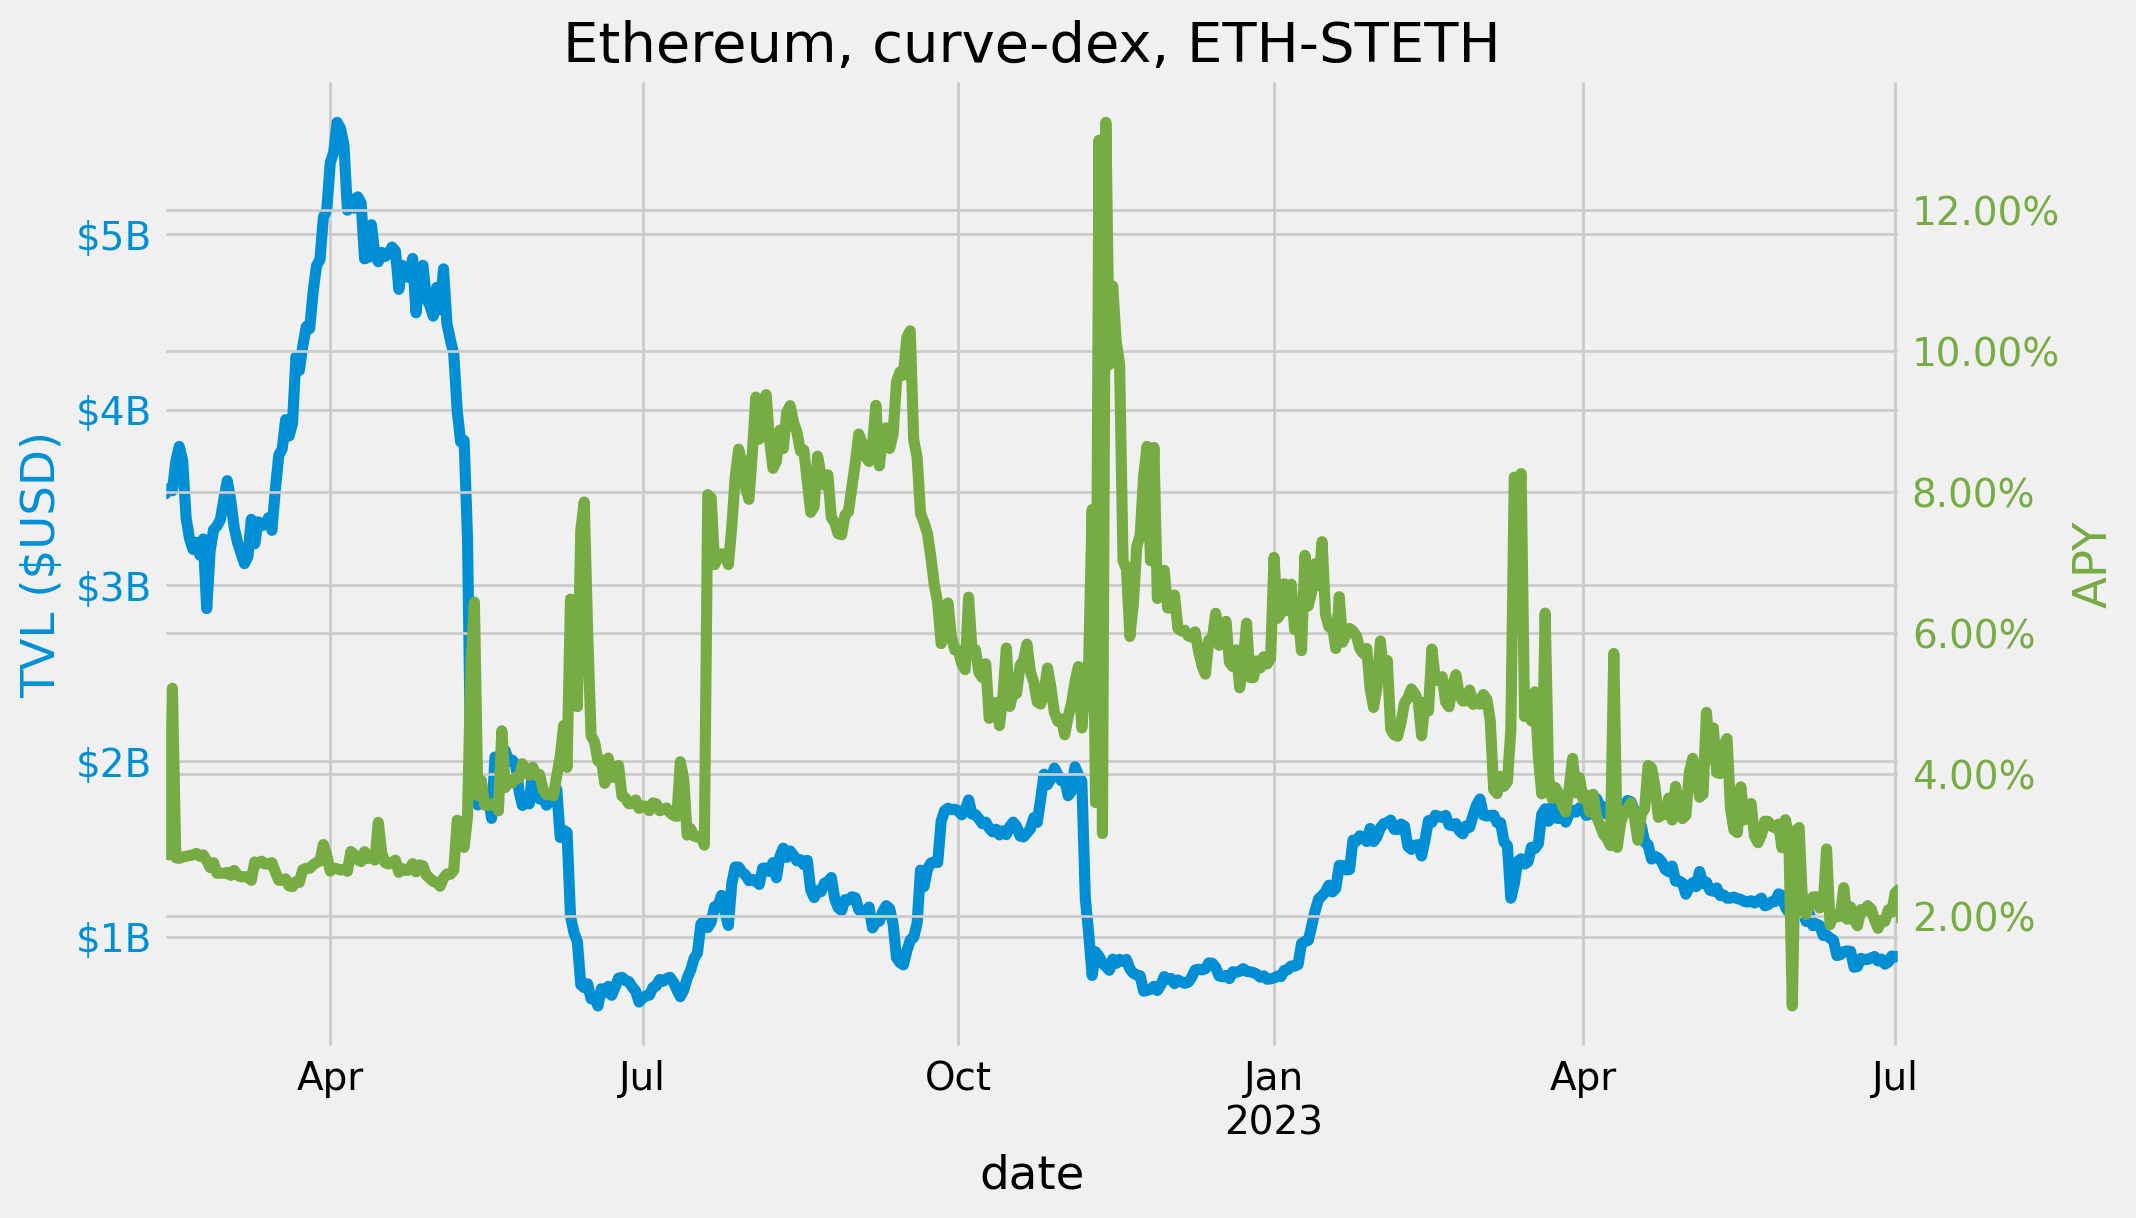

In [ ]:
# plot both TVL and APY over time to see their relationships. 
ax1 = df.tvlUsd.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax1.yaxis.set_major_formatter(dollar_formatter)
for tl in ax1.get_yticklabels():
    tl.set_color('#008FD5')
ax1.set_ylabel('TVL ($USD)', color='#008FD5')

ax2 = ax1.twinx()
ax2.plot(df.index, df.apy, color='#77AB43')
ax2.yaxis.set_major_formatter(PercentFormatter(decimals=2))
for tl in ax2.get_yticklabels():
    tl.set_color('#77AB43')
ax2.set_ylabel('APY', color='#77AB43')

fig_tit = ', '.join(meta.values.tolist()[0])
plt.title(fig_tit);    